In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

###### Put all stats in easily manageable arrays - first lists by year

In [2]:
dset = 'COMB'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_COMB_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_COMB_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_COMB_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_COMB_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_COMB_ds = pd.read_csv(fname)

COMB_ds = [df_2013_COMB_ds,df_2014_COMB_ds,df_2015_COMB_ds,df_2016_COMB_ds,df_2017_COMB_ds]

yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_COMB_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_COMB_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_COMB_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_COMB_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_COMB_ss = pd.read_csv(fname)

COMB_ss = [df_2013_COMB_ss,df_2014_COMB_ss,df_2015_COMB_ss,df_2016_COMB_ss,df_2017_COMB_ds]

dset = 'GRL'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_GRL_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_GRL_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_GRL_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_GRL_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_GRL_ds = pd.read_csv(fname)

GRL_ds = [df_2013_GRL_ds,df_2014_GRL_ds,df_2015_GRL_ds,df_2016_GRL_ds,df_2017_GRL_ds]
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_GRL_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_GRL_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_GRL_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_GRL_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_GRL_ss = pd.read_csv(fname)
GRL_ss = [df_2013_GRL_ss,df_2014_GRL_ss,df_2015_GRL_ss,df_2016_GRL_ss,df_2017_GRL_ds]

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_D14_ss = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_D15_ss = pd.read_csv(fname)

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_D14_ds = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_D15_ds = pd.read_csv(fname)

In [3]:
#columns are years
alk_bias_COMB_ds = np.zeros([5,5])
alk_RMSE_COMB_ds = np.zeros([5,5])
alk_WSS_COMB_ds = np.zeros([5,5])
alk_stdrat_MtoO_COMB_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    alk_bias_COMB_ds[:,i] = COMB_ds[i]['alk_bias'][:]
    alk_RMSE_COMB_ds[:,i] = COMB_ds[i]['alk_RMSE'][:]
    alk_WSS_COMB_ds[:,i] = COMB_ds[i]['alk_WSS'][:]
    alk_stdrat_MtoO_COMB_ds[:,i] = COMB_ds[i]['alk_stdrat_MtoO'][:]

alk_bias_COMB_ss = np.zeros([5,5])
alk_RMSE_COMB_ss = np.zeros([5,5])
alk_WSS_COMB_ss = np.zeros([5,5])
alk_stdrat_MtoO_COMB_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    alk_bias_COMB_ss[:,i] = COMB_ss[i]['alk_bias'][:]
    alk_RMSE_COMB_ss[:,i] = COMB_ss[i]['alk_RMSE'][:]
    alk_WSS_COMB_ss[:,i] = COMB_ss[i]['alk_WSS'][:]
    alk_stdrat_MtoO_COMB_ss[:,i] = COMB_ss[i]['alk_stdrat_MtoO'][:]
    
#columns are years
alk_bias_GRL_ds = np.zeros([5,5])
alk_RMSE_GRL_ds = np.zeros([5,5])
alk_WSS_GRL_ds = np.zeros([5,5])
alk_stdrat_MtoO_GRL_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    alk_bias_GRL_ds[:,i] = GRL_ds[i]['alk_bias'][:]
    alk_RMSE_GRL_ds[:,i] = GRL_ds[i]['alk_RMSE'][:]
    alk_WSS_GRL_ds[:,i] = GRL_ds[i]['alk_WSS'][:]
    alk_stdrat_MtoO_GRL_ds[:,i] = GRL_ds[i]['alk_stdrat_MtoO'][:]

alk_bias_GRL_ss = np.zeros([5,5])
alk_RMSE_GRL_ss = np.zeros([5,5])
alk_WSS_GRL_ss = np.zeros([5,5])
alk_stdrat_MtoO_GRL_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    alk_bias_GRL_ss[:,i] = GRL_ss[i]['alk_bias'][:]
    alk_RMSE_GRL_ss[:,i] = GRL_ss[i]['alk_RMSE'][:]
    alk_WSS_GRL_ss[:,i] = GRL_ss[i]['alk_WSS'][:]
    alk_stdrat_MtoO_GRL_ss[:,i] = GRL_ss[i]['alk_stdrat_MtoO'][:]

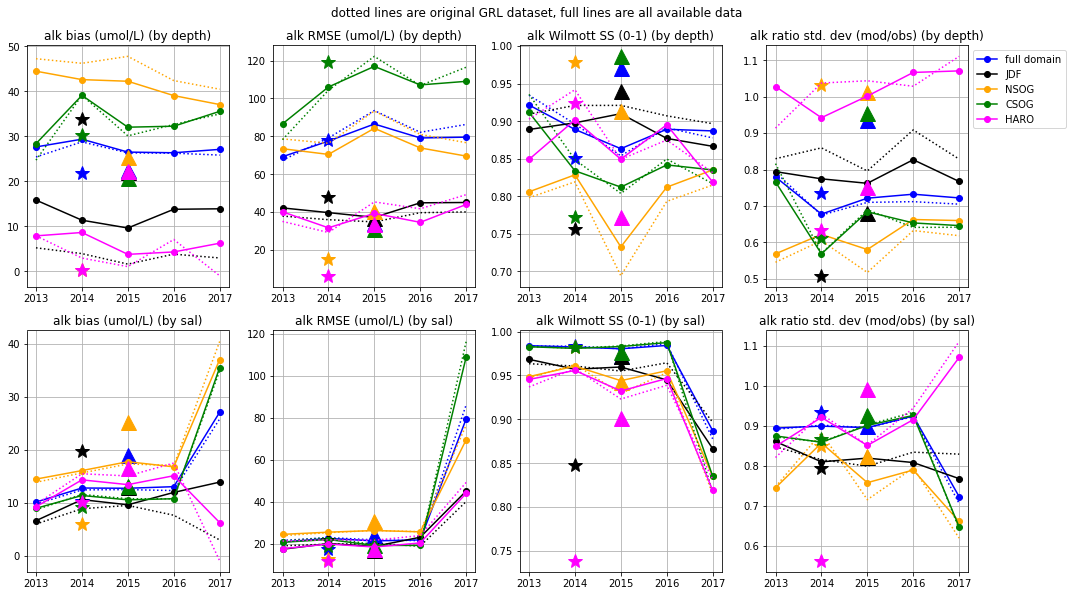

In [4]:
#arrays for storing metrics - first dimension is year, second is region (1-4 is JDF/NSOG/CSOG/HARO, 5 is overall)
reg_cols = ['blue','k', 'orange','green', 'fuchsia',  ]
plotabs = [alk_bias_COMB_ds, alk_RMSE_COMB_ds, alk_WSS_COMB_ds, alk_stdrat_MtoO_COMB_ds,\
           alk_bias_COMB_ss, alk_RMSE_COMB_ss, alk_WSS_COMB_ss, alk_stdrat_MtoO_COMB_ss]
plotabs_GRL = [alk_bias_GRL_ds, alk_RMSE_GRL_ds, alk_WSS_GRL_ds, alk_stdrat_MtoO_GRL_ds,\
           alk_bias_GRL_ss, alk_RMSE_GRL_ss, alk_WSS_GRL_ss, alk_stdrat_MtoO_GRL_ss]
plotabs_D14 = [df_2014_D14_ds['alk_bias'],df_2014_D14_ds['alk_RMSE'],df_2014_D14_ds['alk_WSS'],\
              df_2014_D14_ds['alk_stdrat_MtoO'],df_2014_D14_ss['alk_bias'],df_2014_D14_ss['alk_RMSE'],\
               df_2014_D14_ss['alk_WSS'],df_2014_D14_ss['alk_stdrat_MtoO']]
plotabs_D15 = [df_2015_D15_ds['alk_bias'],df_2015_D15_ds['alk_RMSE'],df_2015_D15_ds['alk_WSS'],\
              df_2015_D15_ds['alk_stdrat_MtoO'],df_2015_D15_ss['alk_bias'],df_2015_D15_ss['alk_RMSE'],\
               df_2015_D15_ss['alk_WSS'],df_2015_D15_ss['alk_stdrat_MtoO']]

reglabs = ['full domain','JDF','NSOG','CSOG','HARO',]
titles = ['alk bias (umol/L) (by depth)','alk RMSE (umol/L) (by depth)',
          'alk Wilmott SS (0-1) (by depth)','alk ratio std. dev (mod/obs) (by depth)',
          'alk bias (umol/L) (by sal)', \
           'alk RMSE (umol/L) (by sal)',\
           'alk Wilmott SS (0-1) (by sal)',
          'alk ratio std. dev (mod/obs) (by sal)']
#plotabs = ['bias','bias']
yrs = np.arange(2013,2018,1)
fact = 0.6
fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,8):

    for y in range(0,5):
        pt = plotabs[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], marker = 'o', label = reglabs[y], linestyle = '-')
        pt = plotabs_GRL[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], linestyle = ':')
        pt = plotabs_D14[i]
        axs[i].plot(2014,pt[y],color = reg_cols[y], marker = '*',markersize = 15)
        pt = plotabs_D15[i]
        axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '^',markersize = 15)        
#         axs[i].set_xticks(yrs)
        axs[i].grid(); axs[i].set_title(titles[i])
    
    if i == 3:
        axs[i].legend(ncol =1, bbox_to_anchor = [1,1])

plt.suptitle('dotted lines are original GRL dataset, full lines are all available data')
plt.tight_layout()

plt.savefig('./extracted_calculated/TA_stats.jpg')